In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install nibabel



In [68]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
training_path = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
testing_path = '../input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

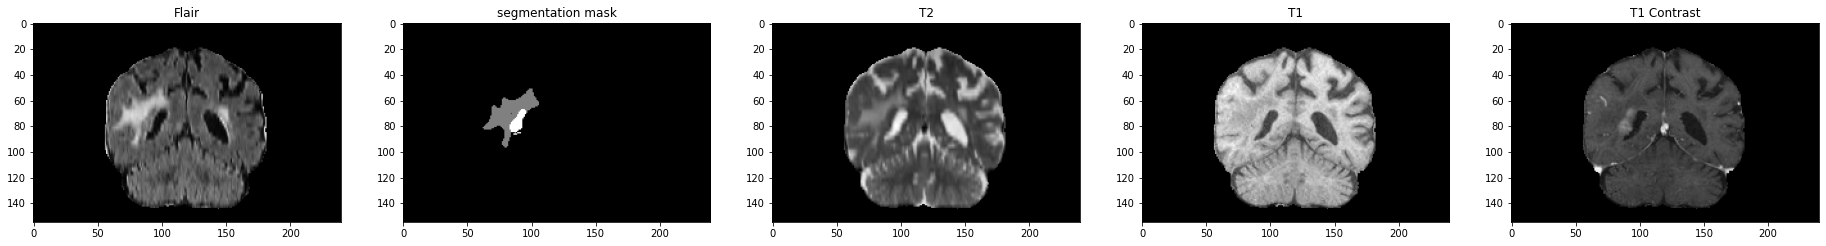



After scaling




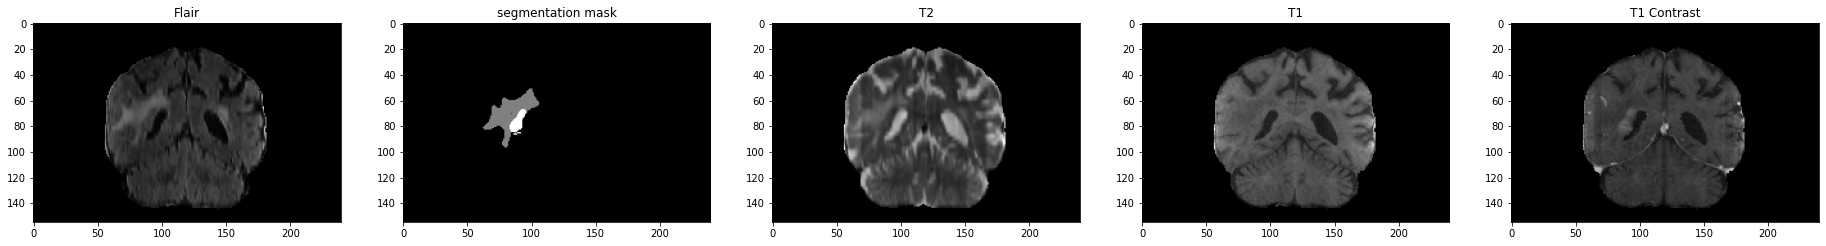

In [89]:
slice_number= 160
img_number = str(np.random.choice(355)).zfill(3)
flair_img_data = nib.load(training_path+"BraTS20_Training_"+img_number+"/BraTS20_Training_"+img_number+"_flair.nii").get_fdata()
seg_img_data = nib.load(training_path+"BraTS20_Training_"+img_number+"/BraTS20_Training_"+img_number+"_seg.nii").get_fdata()
t2_img_data = nib.load(training_path+"BraTS20_Training_"+img_number+"/BraTS20_Training_"+img_number+"_t2.nii").get_fdata()
t1_img_data = nib.load(training_path+"BraTS20_Training_"+img_number+"/BraTS20_Training_"+img_number+"_t1.nii").get_fdata()
t1ce_img_data = nib.load(training_path+"BraTS20_Training_"+img_number+"/BraTS20_Training_"+img_number+"_t1ce.nii").get_fdata()


plt.figure(figsize=(32,16))
plt.subplot(1,5,1)
plt.title("Flair")
plt.imshow(np.rot90(flair_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,2)
plt.title("segmentation mask")
plt.imshow(np.rot90(seg_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,3)
plt.title("T2")
plt.imshow(np.rot90(t2_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,4)
plt.title("T1")
plt.imshow(np.rot90(t1_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,5)
plt.title("T1 Contrast")
plt.imshow(np.rot90(t1ce_img_data[:,slice_number,:]),cmap='gray')
plt.show()

scalar = Normalizer()
normalized_flair_img_data =scalar.fit_transform(flair_img_data.reshape(-1, flair_img_data.shape[-1])).reshape(flair_img_data.shape)
normalized_seg_img_data= seg_img_data.astype(np.uint8)
normalized_t2_img_data =scalar.fit_transform(t2_img_data.reshape(-1, t2_img_data.shape[-1])).reshape(t2_img_data.shape)
normalized_t1_img_data =scalar.fit_transform(t1_img_data.reshape(-1, t1_img_data.shape[-1])).reshape(t1_img_data.shape) 
normalized_t1ce_img_data =scalar.fit_transform(t1ce_img_data.reshape(-1, t1ce_img_data.shape[-1])).reshape(t1ce_img_data.shape)

print("\n\nAfter scaling\n\n")

plt.figure(figsize=(32,16))
plt.subplot(1,5,1)
plt.title("Flair")
plt.imshow(np.rot90(normalized_flair_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,2)
plt.title("segmentation mask")
plt.imshow(np.rot90(normalized_seg_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,3)
plt.title("T2")
plt.imshow(np.rot90(normalized_t2_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,4)
plt.title("T1")
plt.imshow(np.rot90(normalized_t1_img_data[:,slice_number,:]),cmap='gray')
plt.subplot(1,5,5)
plt.title("T1 Contrast")
plt.imshow(np.rot90(normalized_t1ce_img_data[:,slice_number,:]),cmap='gray')
plt.show()

In [91]:
normalized_t2_img_data.max()

1.0

### Annotations comprise of 
* label 1: necrotic and non-enhancing tumor core (NCR/NET)
* label 2: peritumoral edema (ED) 
* label 4: GD-enhancing tumor (ET) 


'055'